In [15]:
#install.packages('rpart')
#install.packages('dplyr')
install.packages('ggplot2')
#install.packages('randomForest')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(rpart)
n <- 1000
sigma <- 0.25
x <- rnorm(n, 0, 1)
y <- 0.75 * x + rnorm(n, 0, sigma)
dat <- data.frame(x = x, y = y)

In [3]:
fit <- rpart(y ~ ., data = dat)

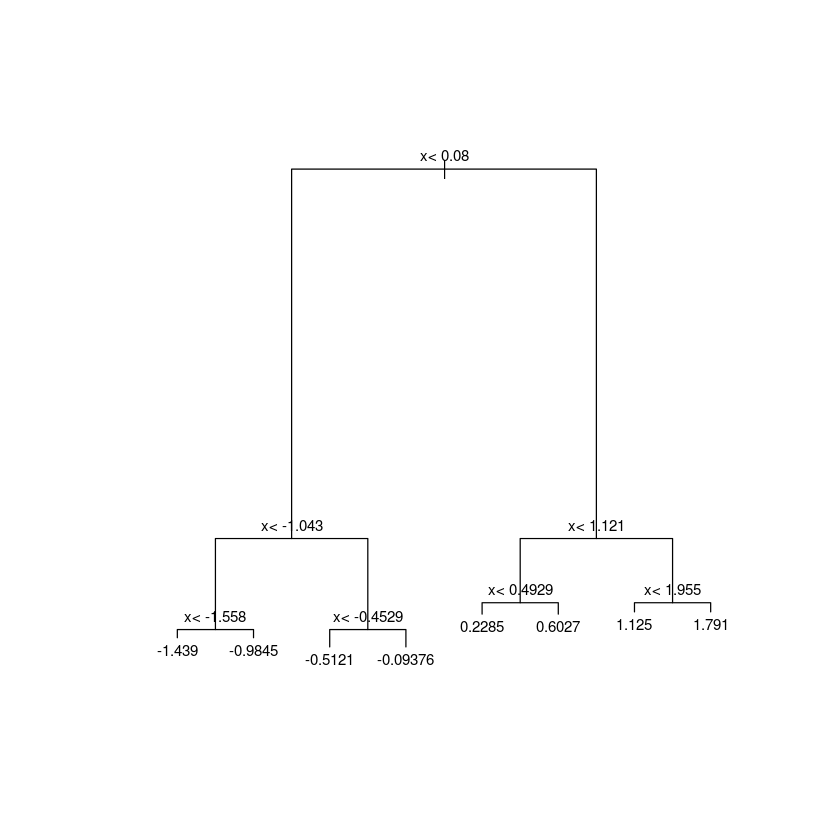

In [4]:
plot(fit,margin = 0.1)
text(fit,cex=0.75)

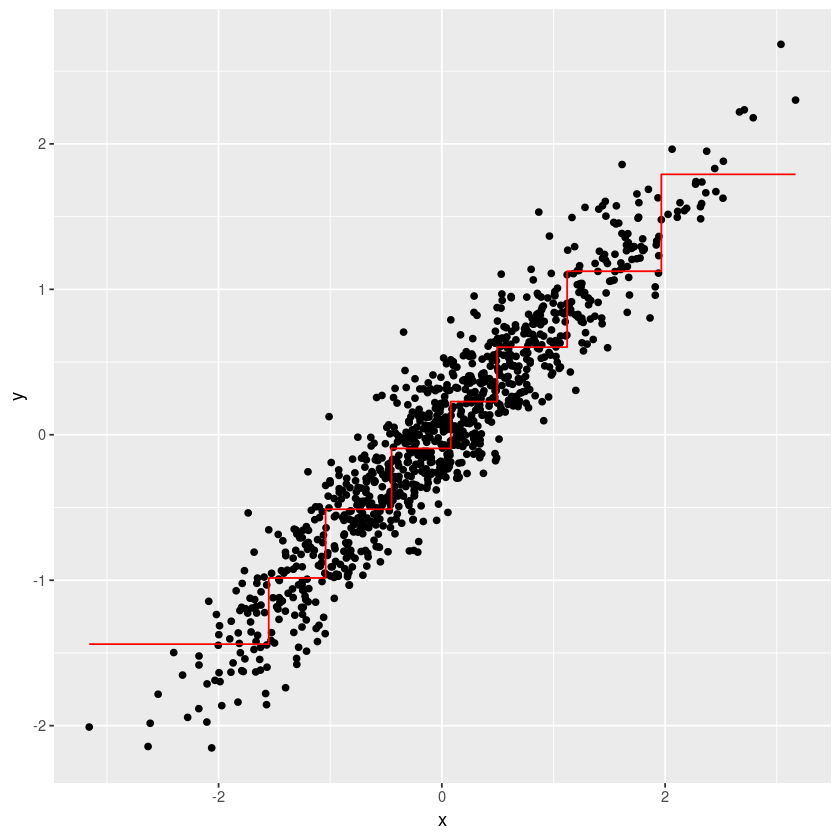

In [19]:
library(dplyr)
library(ggplot2)

dat %>% mutate(y_hat = predict(fit)) %>% ggplot() + geom_point(aes(x, y)) + geom_step(aes(x, y_hat), col=2)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



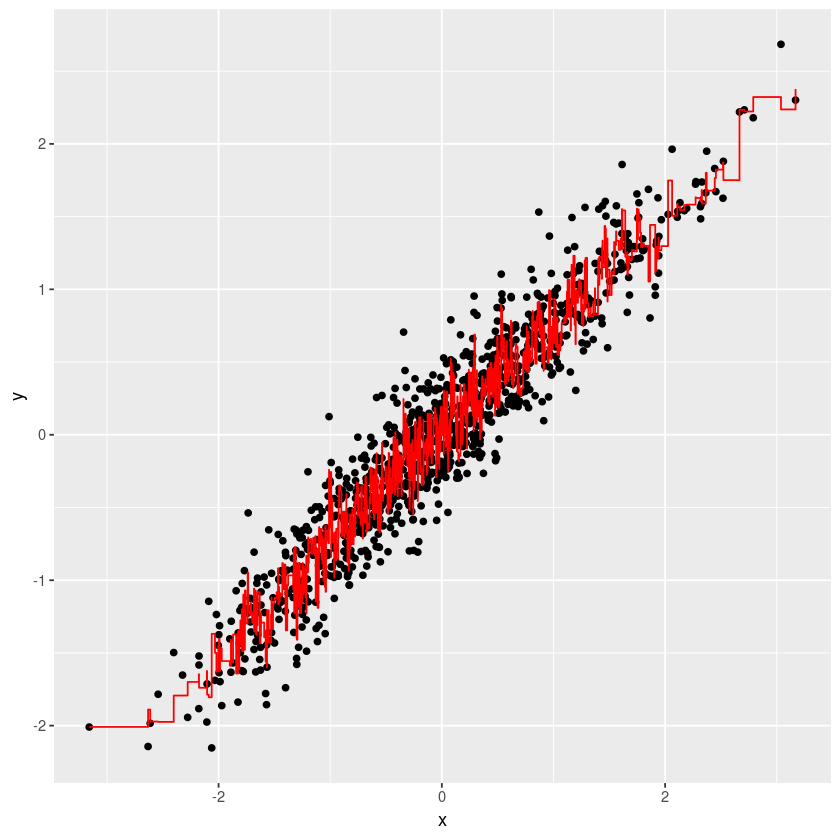

In [20]:
library(randomForest)

fit <- randomForest(y ~ x, data = dat) 

dat %>% 
	mutate(y_hat = predict(fit)) %>% 
	ggplot() +
	geom_point(aes(x, y)) +
	geom_step(aes(x, y_hat), col = 2)

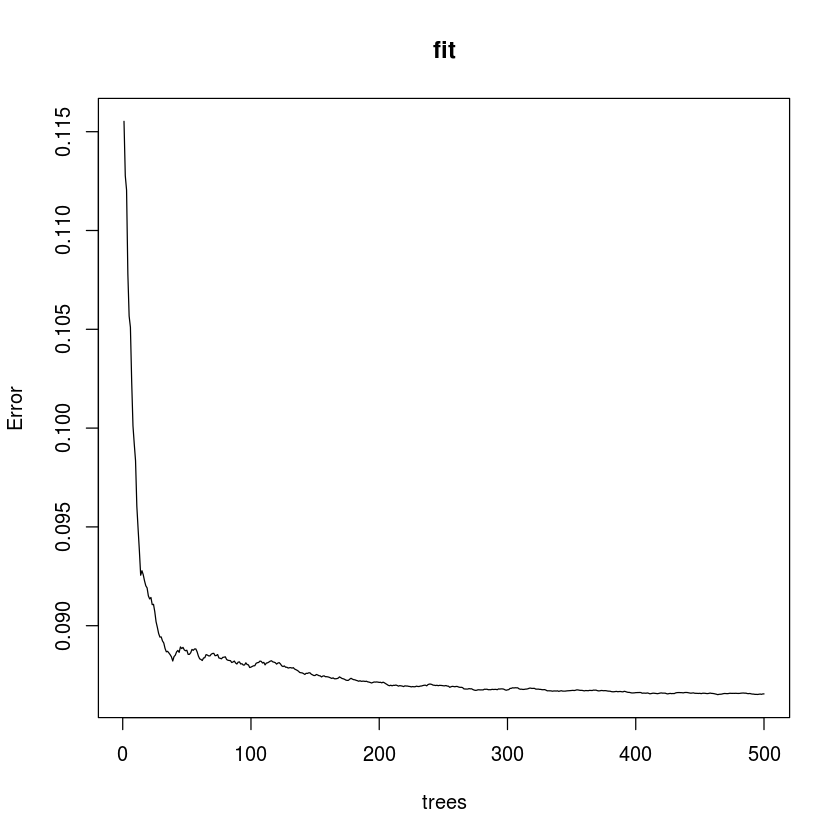

In [21]:
plot(fit)

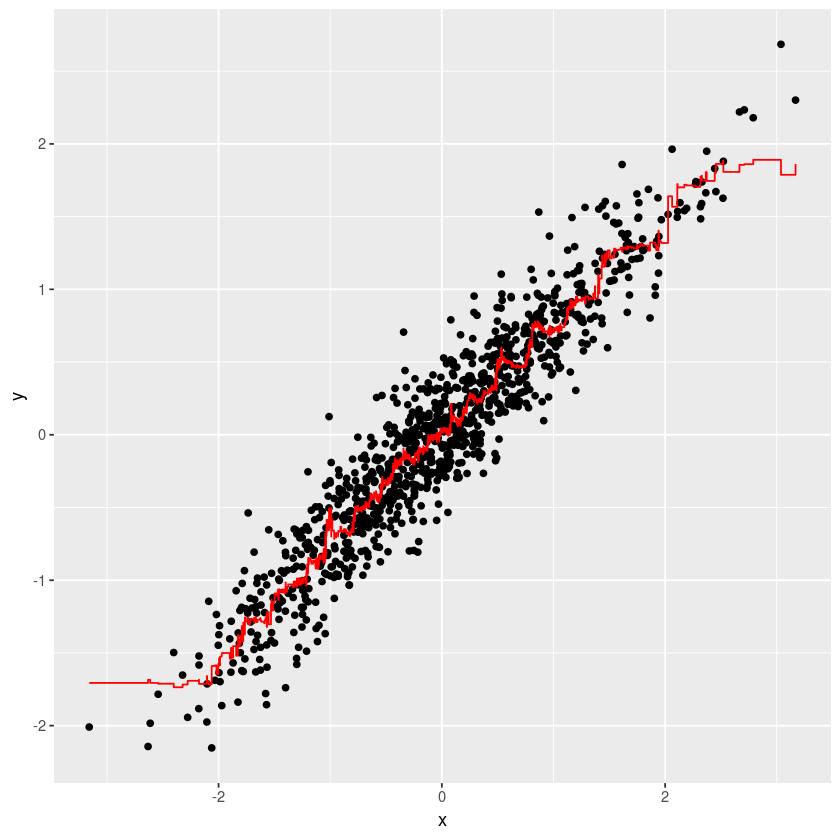

In [22]:
fit <- randomForest(y ~ x, data = dat, nodesize = 50, maxnodes = 25)
dat %>% 
	mutate(y_hat = predict(fit)) %>% 
	ggplot() +
	geom_point(aes(x, y)) +
	geom_step(aes(x, y_hat), col = 2)